In [ ]:
import numpy as np
import torch

from matplotlib import pyplot as plt
import pandas as pd 

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [ ]:
class Args:
    num_epochs=20
    patience=50
    lr=1e-4
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

  1024/494021: [>...............................] - ETA 0.0s

/home/aarsh.wankar/DAGMM/PyTorch-DAGMM Karan/forward_step.py:108: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:1754.)
  l = torch.cholesky(a, False)


494021/494021: [===============================>] - ETA 0.4sss
Training DAGMM... Epoch: 0, Loss: 363588119.586
494021/494021: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 1, Loss: 363445816.050
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 2, Loss: 363102862.112
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 3, Loss: 362960662.725
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 4, Loss: 364207939.511
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 5, Loss: 363340200.547
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 6, Loss: 364105835.826
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 7, Loss: 364148196.008
494021/494021: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 8, Loss: 363912557.284
494021/49

70
Testing...


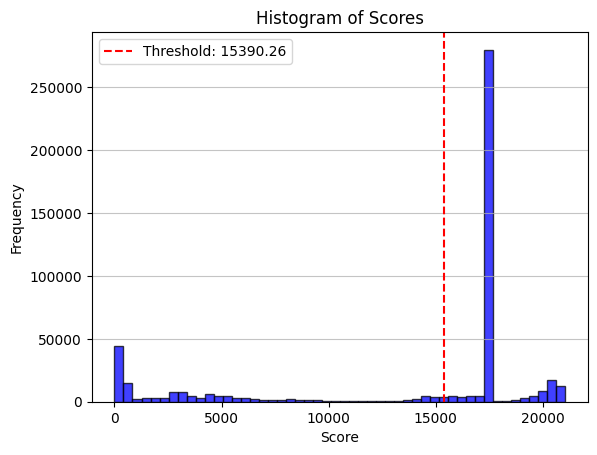

Precision : 0.6554, Recall : 0.9985, F-score : 0.7914
ROC AUC score: 4.87
72
Testing...


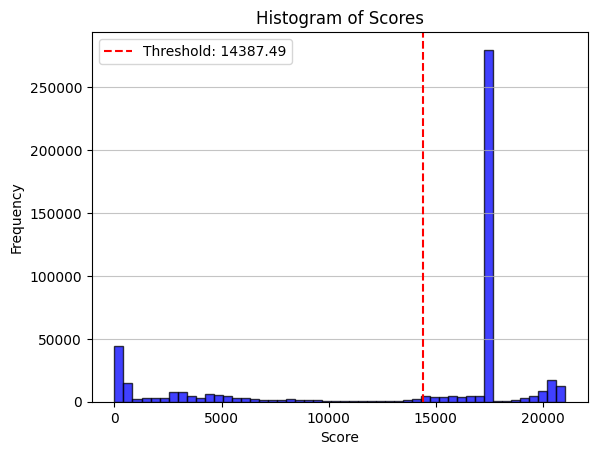

Precision : 0.7019, Recall : 0.9981, F-score : 0.8242
ROC AUC score: 4.87
73
Testing...


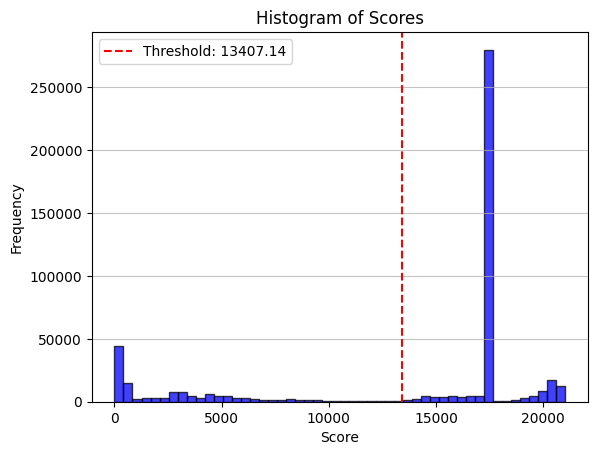

Precision : 0.7237, Recall : 0.9923, F-score : 0.8370
ROC AUC score: 4.87
74
Testing...


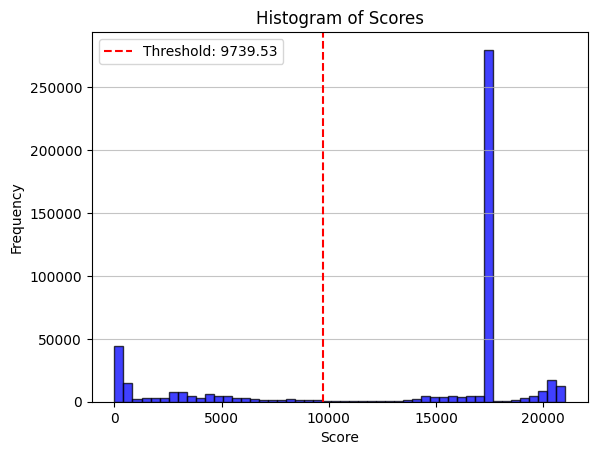

Precision : 0.7411, Recall : 0.9785, F-score : 0.8434
ROC AUC score: 4.87
75
Testing...


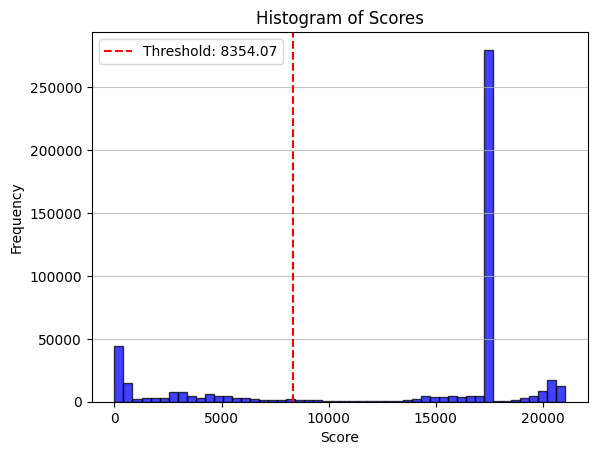

Precision : 0.7377, Recall : 0.9366, F-score : 0.8253
ROC AUC score: 4.87
80
Testing...


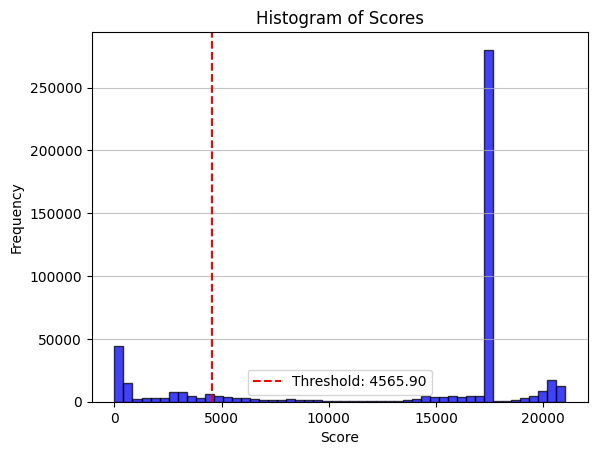

Precision : 0.6970, Recall : 0.7080, F-score : 0.7025
ROC AUC score: 4.87


In [ ]:
# del get_KDDCup99
from preprocess import get_KDDCup99
data = get_KDDCup99(args)


# from test import eval
sub = [70, 72, 73, 74, 75, 80]
for s in sub:
    print(s)
    labels, scores = eval(dagmm.model, data, device, args.n_gmm, s)

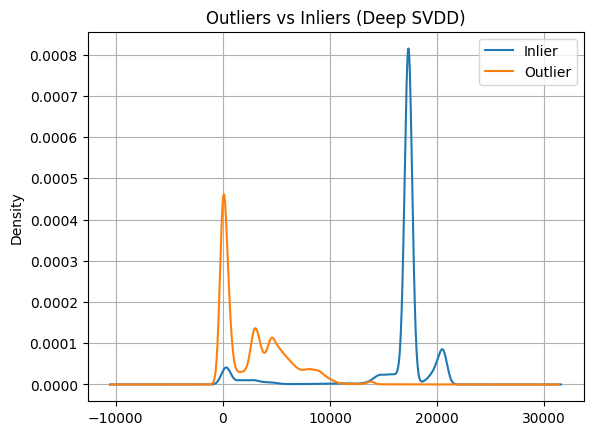

In [ ]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()